## Observations and Insights 

In [2]:
# The code in this cell is courtesy of the starter code writer.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# importing numpy is my idea
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head(12)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()


249

In [5]:
#checking dataframe length

len(combined_df)

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["duplicated"] = combined_df.duplicated(["Mouse ID", "Timepoint"])
combined_df.loc[combined_df["duplicated"] == True, :].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == "g989", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Perhaps the wrong Mouse ID was entered? I interpret the instuction
# to ask for all records related to this mouse to be purged.

cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

cleaned_gb = cleaned_df.groupby("Drug Regimen")

summary = cleaned_gb["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = cleaned_gb["Mouse ID"].nunique()
mouse_count


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

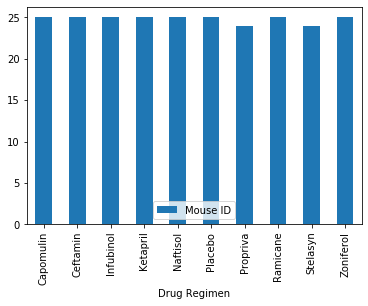

In [13]:
# Using Pandas DataFrame.plot()
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Convert mouse_count from a series to a dataframe.

mouse_count_df = mouse_count.to_frame()

mouse_count_df.plot(kind="bar")


NameError: name 'tick_locations' is not defined

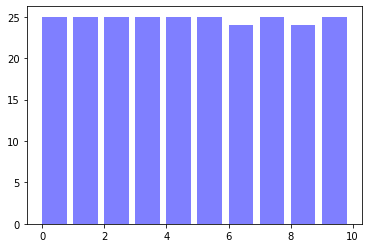

In [14]:
# Using PyPlot
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(mouse_count))
# tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure()#(figsize=(10,5))
plt.bar(x_axis, mouse_count, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, mouse_count.index)# , rotation="horizontal")




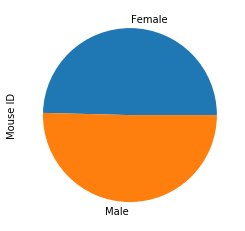

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_gb = cleaned_df.groupby("Sex")
gender_series = gender_gb.nunique()["Mouse ID"]


gender_series.plot.pie()



([<matplotlib.patches.Wedge at 0x27ed62100c8>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

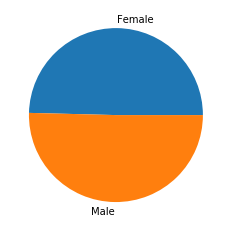

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_series, labels=["Female","Male"], )



## Quartiles, Outliers and Boxplots

In [17]:
cleaned_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
1873,z795,Naftisol,Female,13,29,0,45.000000,0,False
1874,z795,Naftisol,Female,13,29,5,46.833475,0,False
1875,z795,Naftisol,Female,13,29,10,48.030804,0,False
1876,z795,Naftisol,Female,13,29,15,49.368132,1,False
1877,z795,Naftisol,Female,13,29,20,53.280657,1,False
1878,z795,Naftisol,Female,13,29,25,57.947100,2,False
1879,z795,Naftisol,Female,13,29,30,59.789636,2,False
1880,z795,Naftisol,Female,13,29,35,60.435654,2,False
1881,z795,Naftisol,Female,13,29,40,62.376639,3,False
1882,z795,Naftisol,Female,13,29,45,65.741070,3,False


In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Getting a data frame with Mouse ID and final Tumor Volume.


final_time_df = cleaned_df.groupby("Mouse ID").max()["Timepoint"].rename("final_time").to_frame()
final_time_df

# Merge the final times with the cleaned_df

final_times_merged_df = pd.merge(cleaned_df, final_time_df, on=["Mouse ID", "Mouse ID"])

# Add a boolean column, true if the Timepoint is equal to the final time for that mouse
final_times_merged_df["Last Observation (T/F)"] = final_times_merged_df["Timepoint"] == final_times_merged_df["final_time"]
final_times_merged_df

#Extracting the final volumes for the rows where "Last Observation (T/F)" is True

final_volumes = final_times_merged_df.loc[final_times_merged_df["Last Observation (T/F)"] == True,:]
final_volumes
# final_time_df = cleaned_df.groupby("Mouse ID").max()["Timepoint"].to_frame()
# final_time_df.reset_index(inplace=True)
# #final_time_df

# final_time_index = cleaned_df.groupby("Mouse ID").idxmax()["Timepoint"].to_frame()
# final_time_index =final_time_index.rename(columns={"Timepoint":"Row"})
# final_time_row_series = final_time_index["Row"]
# final_time_row_series

# final_volumes = cleaned_df.loc[final_time_row_series, ["Mouse ID", "Tumor Volume (mm3)"]]
# final_volumes



# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated,final_time,Last Observation (T/F)
9,k403,Ramicane,Male,21,16,45,22.050126,1,False,45,True
19,s185,Capomulin,Female,3,17,45,23.343598,1,False,45,True
29,x401,Capomulin,Female,16,15,45,28.484033,0,False,45,True
39,m601,Capomulin,Male,22,17,45,28.430964,1,False,45,True
49,g791,Ramicane,Male,11,16,45,29.128472,1,False,45,True
...,...,...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,False,5,True
1849,z435,Propriva,Female,12,26,10,48.710661,0,False,10,True
1859,z581,Infubinol,Female,24,25,45,62.754451,3,False,45,True
1869,z795,Naftisol,Female,13,29,45,65.741070,3,False,45,True


In [39]:
#This worked also for finding final tumor volumes


# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse

# # Getting a data frame with Mouse ID and final Tumor Volume.

# final_time_df = cleaned_df.groupby("Mouse ID").max()["Timepoint"].to_frame()
# final_time_df.reset_index(inplace=True)
# #final_time_df

# final_time_index = cleaned_df.groupby("Mouse ID").idxmax()["Timepoint"].to_frame()
# final_time_index =final_time_index.rename(columns={"Timepoint":"Row"})
# final_time_row_series = final_time_index["Row"]
# final_time_row_series

# final_volumes = cleaned_df.loc[final_time_row_series, ["Mouse ID", "Tumor Volume (mm3)"]]
# final_volumes



# # # Merge this group df with the original dataframe to get the tumor volume at the last timepoint




,Mouse ID,Tumor Volume (mm3)
463,a203,67.973419
473,a251,65.525743
483,a262,70.717621
493,a275,62.999356
500,a366,63.440686
...,...,...
1862,z435,48.710661
84,z578,30.638696
1872,z581,62.754451
1882,z795,65.741070


In [78]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

treat_volumes = []


# Creating a list to store analysis of quartiles and outlier bounds
quartile_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for med in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    med_volume = final_volumes.loc[final_volumes["Drug Regimen"] == med, "Tumor Volume (mm3)"]
    #print(med_volume) #scrap
    
    
    # add subset 
    treat_volumes.append(med_volume)
    

    # Determine outliers using upper and lower bounds
    q1 = med_volume.quantile(.25)
    median_final_volume = med_volume.quantile(.5)
    q3 = med_volume.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    upper_outliers = med_volume[med_volume > upper]
    if upper_outliers.empty:
        upper_outlier_detected = False
    else:
        upper_outlier_detected = True
    
    
    lower_outliers = med_volume[med_volume < lower]
    if lower_outliers.empty:
        lower_outlier_detected = False
    else:
        lower_outlier_detected = True
    
    
    # Keeping results in list of dictionaries. I want to present results in a dataframe eventually.
    dict = {"Treatment": med, 
            "Lower Quartile": q1, 
            "Median": median_final_volume, 
            "Upper Quartile":q3,
            "Interquartile Range": iqr,
            "Possible Outliers are Lower Than": lower,
            "Possible Outliers are Higher Than": upper,
            "Lower Outlier(s) Indicated (T/F)": lower_outlier_detected,
            "Upper Outlier(s) Indicated (T/F)": upper_outlier_detected}
    
    quartile_list.append(dict)
    
quartile_df = pd.DataFrame(quartile_list)
quartile_df = quartile_df.set_index("Treatment")
quartile_df  
#     print(upper_outlier_detected)
#     print(lower_outlier_detected)


#    print(dict)
#     print(upper_outliers.head())
#     print(lower_outliers.head())                                   
                                       
                                       
    

,Lower Quartile,Median,Upper Quartile,Interquartile Range,Possible Outliers are Lower Than,Possible Outliers are Higher Than,Lower Outlier(s) Indicated (T/F),Upper Outlier(s) Indicated (T/F)
Treatment,,,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,False,False
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,False,False
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,True,False
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,False,False


In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumes = final_volumes.loc[final_volumes["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
fig, ax = plt.subplots()
# ax1.set_title('Final Tumor Volume')
# ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.boxplot(volumes)


ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())


plt.show()

SyntaxError: invalid syntax (<ipython-input-84-c5f504c818f7>, line 3)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
